### Eigenchannel plot

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scienceplots

matplotlib.rcParams['font.family'] = r'C://Users//sevke//Desktop//Dev//fonts//fira_sans//FiraSans-Regular.ttf'
prop = fm.FontProperties(fname=r'C://Users//sevke//Desktop//Dev//fonts//fira_sans//FiraSans-Regular.ttf')
plt.style.use(['science', 'notebook', 'no-latex'])

datpath = r"C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\3y_1y2x_1y\trans_prob_matrices\3y_1y2x_1y___PT_elL=Ribbon2D_elR=Ribbon2D_CC=FiniteLattice2D_intrange=1_kc=900_kc_xy=180_trans_prob_matrix.npz"

loaded_data = np.load(datpath)

w = loaded_data['w']
trans_prob = loaded_data['trans_prob_matrix']
trans_prob.shape

(10000, 4, 4)

In [2]:
# Extract eigenvalues and eigenvectors for all 10000 matrices
print(f"Shape of trans_prob matrix: {trans_prob.shape}")
print(f"Number of frequencies: {len(w)}")

# Arrays for all eigenvalues and eigenvectors
all_eigenvals = np.zeros((trans_prob.shape[0], trans_prob.shape[1]), dtype=complex)
all_eigenvecs = np.zeros((trans_prob.shape[0], trans_prob.shape[1], trans_prob.shape[2]), dtype=complex)

# Calculate eigenvalues and eigenvectors for each matrix
print("Calculating eigenvalues and eigenvectors...")
for i in range(trans_prob.shape[0]):
    '''if i % 1000 == 0:
        print(f"Progress: {i}/{trans_prob.shape[0]} ({100*i/trans_prob.shape[0]:.1f}%)")
    '''
    # Calculate eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eig(trans_prob[i])
    
    # Sort in descending order by magnitude of eigenvalues
    sort_indices = np.argsort(np.abs(eigvals))[::-1]
    
    # Store sorted values
    all_eigenvals[i] = eigvals[sort_indices]
    all_eigenvecs[i] = eigvecs[:, sort_indices]

print("Finished!")

Shape of trans_prob matrix: (10000, 4, 4)
Number of frequencies: 10000
Calculating eigenvalues and eigenvectors...
Finished!


Maximum imaginary part of eigenvalues: 1.11e-16
Eigenvalues are practically real - converting to real


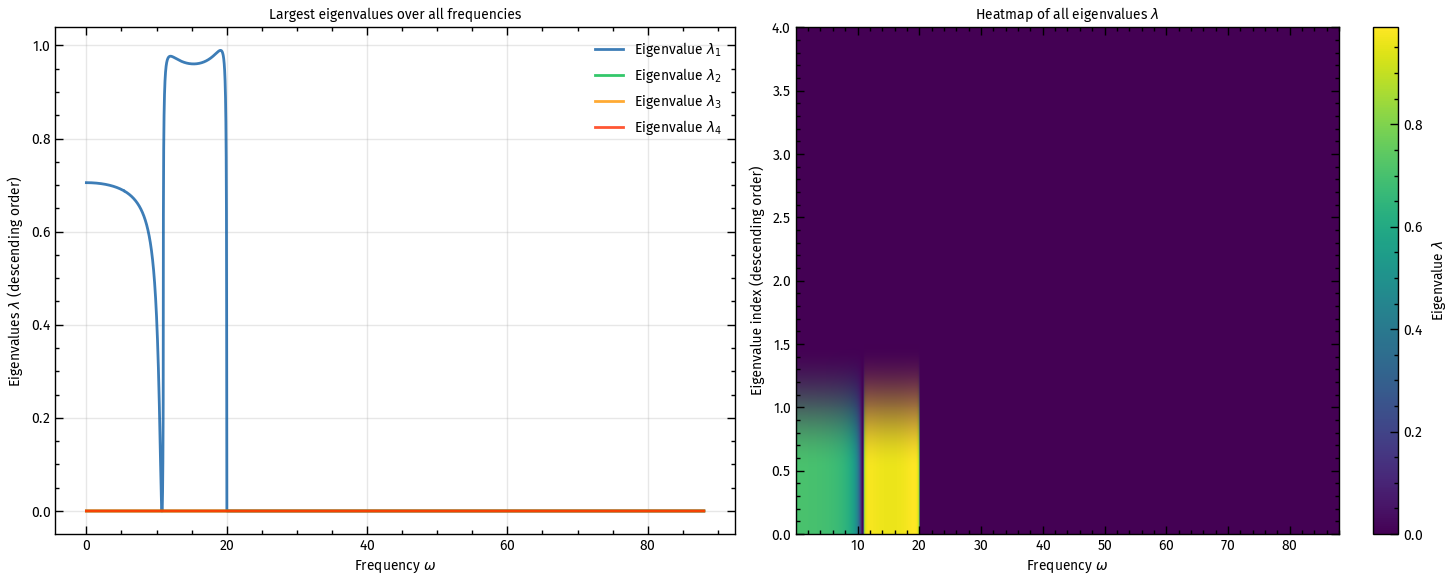

Minimum eigenvalue: 0.000000
Maximum eigenvalue: 0.989306
Average largest eigenvalue: 0.176404
Average smallest eigenvalue: 0.000000


In [3]:
# Plot of the first few eigenvalues over all frequencies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Check if eigenvalues are real (they should be for transmission matrices)
max_imag_part = np.max(np.abs(np.imag(all_eigenvals)))
print(f"Maximum imaginary part of eigenvalues: {max_imag_part:.2e}")

if max_imag_part < 1e-10:
    print("Eigenvalues are practically real - converting to real")
    all_eigenvals_real = np.real(all_eigenvals)
else:
    print("Eigenvalues have significant imaginary parts")
    all_eigenvals_real = all_eigenvals

# Plot 1: The first 5 eigenvalues over all frequencies
for i in range(min(5, all_eigenvals_real.shape[1])):
    ax1.plot(w, all_eigenvals_real[:, i], label=rf'Eigenvalue $\lambda_{{{i+1}}}$', alpha=0.8)

ax1.set_xlabel(r'Frequency $\omega$', fontproperties=prop)
ax1.set_ylabel(r'Eigenvalues $\lambda$ (descending order)', fontproperties=prop)
ax1.set_title(r'Largest eigenvalues over all frequencies', fontproperties=prop)
ax1.legend(prop=prop)
ax1.grid(True, alpha=0.3)
ax1.tick_params(labelsize=10)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontproperties(prop)

# Plot 2: Heatmap of all eigenvalues
im = ax2.imshow(all_eigenvals_real.T, aspect='auto', origin='lower', 
                extent=[w.min(), w.max(), 0, all_eigenvals_real.shape[1]])
ax2.set_xlabel(r'Frequency $\omega$', fontproperties=prop)
ax2.set_ylabel(r'Eigenvalue index (descending order)', fontproperties=prop)
ax2.set_title(r'Heatmap of all eigenvalues $\lambda$', fontproperties=prop)
cbar = plt.colorbar(im, ax=ax2, label=r'Eigenvalue $\lambda$')
cbar.ax.set_ylabel(r'Eigenvalue $\lambda$', fontproperties=prop)
cbar.ax.tick_params(labelsize=10)
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(prop)
ax2.tick_params(labelsize=10)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontproperties(prop)

plt.tight_layout()
plt.show()

# Show statistics about eigenvalue distribution
print(f"Minimum eigenvalue: {np.min(all_eigenvals_real):.6f}")
print(f"Maximum eigenvalue: {np.max(all_eigenvals_real):.6f}")
print(f"Average largest eigenvalue: {np.mean(all_eigenvals_real[:, 0]):.6f}")
print(f"Average smallest eigenvalue: {np.mean(all_eigenvals_real[:, -1]):.6f}")

In [4]:
# Save the results
save_path = r"C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\tests\trans_prob_matrices\eigenanalysis.npz"

np.savez(save_path,
         w=w,
         eigenvals=all_eigenvals_real,
         eigenvecs=all_eigenvecs,
         description="Eigenvalues and eigenvectors of transmission matrices, sorted in descending order by eigenvalue magnitude")

print(f"Data saved to: {save_path}")

# Additionally: Save only eigenvalues as separate file for faster access
eigenvals_path = r"C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\tests\trans_prob_matrices\eigenvals_sorted.npz"
np.savez(eigenvals_path, w=w, eigenvals=all_eigenvals_real)
print(f"Eigenvalues only saved to: {eigenvals_path}")

# Show memory usage
size_mb = (all_eigenvals.nbytes + all_eigenvecs.nbytes) / (1024**2)
print(f"Memory usage of arrays: {size_mb:.2f} MB")

Data saved to: C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\tests\trans_prob_matrices\eigenanalysis.npz
Eigenvalues only saved to: C:\Users\sevke\Desktop\Dev\MA\phonokit\plot\tests\trans_prob_matrices\eigenvals_sorted.npz
Memory usage of arrays: 3.05 MB


In [6]:
# Look at the exact eigenvalues in more detail
print("=== DETAILED EIGENVALUE ANALYSIS ===\n")

freq1, freq2 = 0, 11.5

for freq_val in [freq1, freq2]:
    freq_diff = np.abs(w - freq_val)
    freq_idx = np.argmin(freq_diff)
    eigvals = all_eigenvals[freq_idx]
    eigvecs = all_eigenvecs[freq_idx]
    
    print(f"FREQUENCY w = {freq_val} (Index: {freq_idx}):")
    print(f"All 8 eigenvalues (sorted, real part):")
    
    for i, eig in enumerate(eigvals):
        real_part = np.real(eig)
        imag_part = np.imag(eig)
        print(f"  λ_{i+1}: {real_part:+.8f} {imag_part:+.2e}j")
        #print(eigvecs[:, i])  # Show the corresponding eigenvector
    print(f"  Sum Real: {np.sum(np.real(eigvals)):.8f}")
    print(f"  Sum Imag: {np.sum(np.imag(eigvals)):.2e}")
    print()

# Also look at the original matrices
print("=== MATRIX PROPERTIES ===")
for freq_val in [freq1, freq2]:
    freq_diff = np.abs(w - freq_val)
    freq_idx = np.argmin(freq_diff)
    matrix = trans_prob[freq_idx]
    
    print(f"FREQUENCY ω = {freq_val}:")
    print(f"Matrix is:")
    print(f"  - Hermitian: {np.allclose(matrix, matrix.conj().T)}")
    print(f"  - Symmetric: {np.allclose(matrix, matrix.T)}")
    print(f"  - Real: {np.allclose(matrix.imag, 0)}")
    print(f"  - Positive semidefinite: {np.all(np.linalg.eigvals(matrix).real >= -1e-10)}")
    print(f"  - Determinant: {np.linalg.det(matrix):.8f}")
    print(f"  - Matrix rank: {np.linalg.matrix_rank(matrix)}")
    print()

=== DETAILED EIGENVALUE ANALYSIS ===

FREQUENCY w = 0 (Index: 0):
All 8 eigenvalues (sorted, real part):
  λ_1: +0.70514861 +0.00e+00j
  λ_2: +0.00000000 +0.00e+00j
  λ_3: +0.00000000 +0.00e+00j
  λ_4: +0.00000000 +0.00e+00j
  Sum Real: 0.70514861
  Sum Imag: 0.00e+00

FREQUENCY w = 11.5 (Index: 1307):
All 8 eigenvalues (sorted, real part):
  λ_1: +0.96711559 -5.55e-17j
  λ_2: +0.00000000 +0.00e+00j
  λ_3: +0.00000000 +0.00e+00j
  λ_4: +0.00000000 +0.00e+00j
  Sum Real: 0.96711559
  Sum Imag: -5.55e-17

=== MATRIX PROPERTIES ===
FREQUENCY ω = 0:
Matrix is:
  - Hermitian: False
  - Symmetric: False
  - Real: False
  - Positive semidefinite: True
  - Determinant: 0.00000000+0.00000000j
  - Matrix rank: 1

FREQUENCY ω = 11.5:
Matrix is:
  - Hermitian: False
  - Symmetric: False
  - Real: False
  - Positive semidefinite: True
  - Determinant: 0.00000000+0.00000000j
  - Matrix rank: 1




🎯 CLEAN REPRESENTATION: EIGENVALUES AND EIGENVECTORS
🎯 EIGENVALUE-EIGENVECTOR ANALYSIS
📊 Frequencies: [0, 11.5, 15]
🔬 Atomic grid: 2×1 = 2 atoms
--------------------------------------------------

FREQUENCY ω = 0 (actual: 0.0010)
  λ1 = 0.7051 (non-null)
  → 1 non-null eigenvalues found

FREQUENCY ω = 11.5 (actual: 11.5036)
  λ1 = 0.9671 (non-null)
  → 1 non-null eigenvalues found

FREQUENCY ω = 15 (actual: 14.9975)
  λ1 = 0.9603 (non-null)
  → 1 non-null eigenvalues found


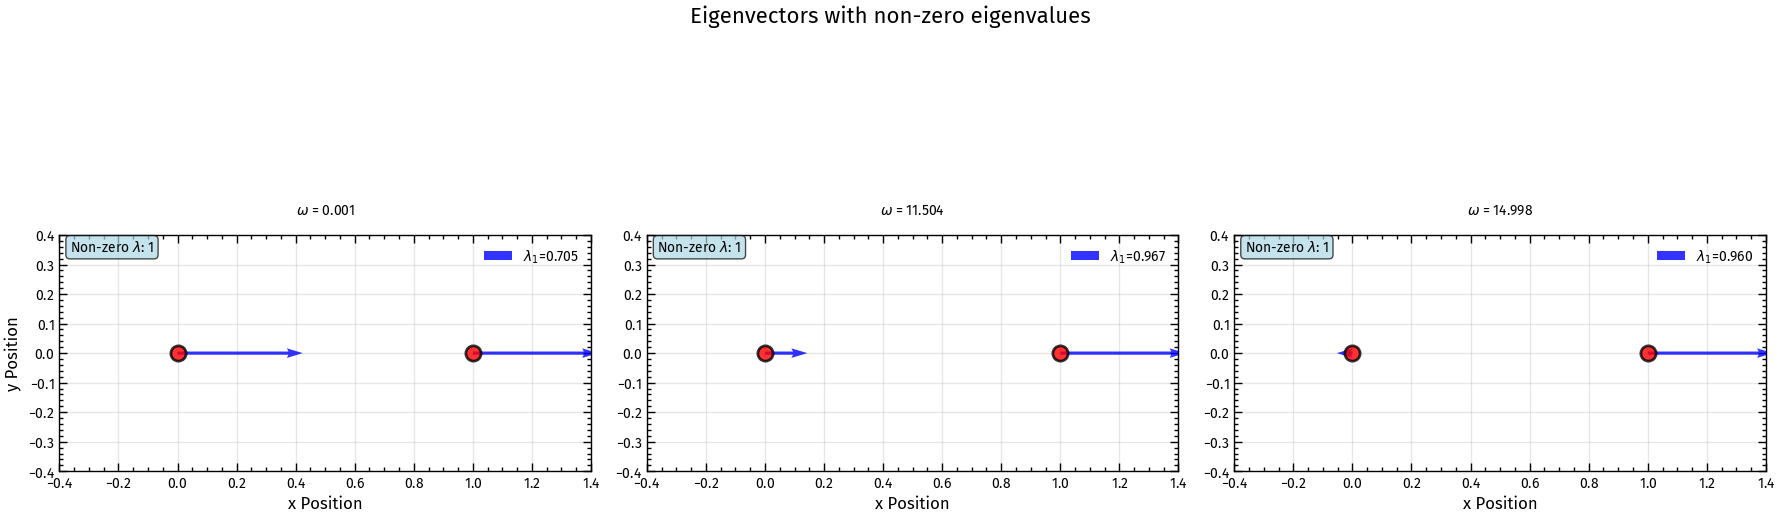


📍 ATOM INDEX ASSIGNMENT (2×1):
   y=0:  0   1


In [7]:
# Clean representation: One subplot per frequency with labeled eigenvalues
def plot_eigenvalues_with_vectors(frequencies, nx=2, ny=2, figsize=(15, 5), 
                                 eigenvalue_threshold=1e-6, scale_factor=0.8):
    """
    Plots atoms with numbered positions for each frequency and shows 
    only eigenvectors with non-null eigenvalues as labeled arrows
    
    Parameters:
    -----------
    frequencies : list
        Desired frequencies (e.g. [10, 15, 21])
    nx, ny : int
        Atomic grid dimensions
    eigenvalue_threshold : float
        Minimum eigenvalue to be considered "non-null"
    scale_factor : float
        Arrow length scaling
    """
    
    total_atoms = nx * ny
    
    print(f"🎯 EIGENVALUE-EIGENVECTOR ANALYSIS")
    print(f"📊 Frequencies: {frequencies}")
    print(f"🔬 Atomic grid: {nx}×{ny} = {total_atoms} atoms")
    print("-" * 50)
    
    # Create subplots - one plot per frequency
    fig, axes = plt.subplots(1, len(frequencies), figsize=figsize)
    if len(frequencies) == 1:
        axes = [axes]
    
    # Create atom positions
    atom_positions = []
    atom_indices = []
    for j in range(ny):  # y: from bottom to top
        for i in range(nx):  # x: from left to right
            atom_positions.append([i * 1.0, j * 1.0])
            atom_indices.append(i * ny + j)  # Column-wise indexing: i*ny + j
    
    atom_positions = np.array(atom_positions)
    
    # For each frequency
    for freq_idx, freq_val in enumerate(frequencies):
        ax = axes[freq_idx]
        
        # Find closest frequency
        freq_diff = np.abs(w - freq_val)
        matrix_idx = np.argmin(freq_diff)
        actual_freq = w[matrix_idx]
        
        eigvals = all_eigenvals[matrix_idx]
        eigvecs = all_eigenvecs[matrix_idx]
        
        print(f"\nFREQUENCY ω = {freq_val} (actual: {actual_freq:.4f})")
        
        # Find non-null eigenvalues
        non_zero_indices = []
        non_zero_eigenvals = []
        
        for i, eig_val in enumerate(eigvals):
            real_val = np.real(eig_val)
            if abs(real_val) > eigenvalue_threshold:
                non_zero_indices.append(i)
                non_zero_eigenvals.append(real_val)
                print(f"  λ{i+1} = {real_val:.4f} (non-null)")
        
        print(f"  → {len(non_zero_indices)} non-null eigenvalues found")
        
        # Plot atoms as red dots
        ax.scatter(atom_positions[:, 0], atom_positions[:, 1], 
                  c='red', s=120, alpha=0.8, zorder=5, edgecolors='black', linewidth=2)
        
        # Number the atoms
        for pos, atom_idx in zip(atom_positions, atom_indices):
            ax.annotate(f'{atom_idx}', pos, xytext=(0, 0), 
                       textcoords='offset points', ha='center', va='center',
                       fontsize=14, color='white', weight='bold', fontproperties=prop)
        
        # For each non-null eigenvalue: plot eigenvector and label
        colors = ['blue', 'green', 'orange', 'purple', 'brown', 'pink']
        
        for i, (eig_idx, eig_val) in enumerate(zip(non_zero_indices, non_zero_eigenvals)):
            # Get eigenvector
            eigenvector = np.real(eigvecs[:, eig_idx])
            
            # Separate x,y components
            x_components = eigenvector[::2][:total_atoms]
            y_components = eigenvector[1::2][:total_atoms]
            
            # Choose color for this eigenvector
            color = colors[i % len(colors)]
            
            # Plot arrows
            max_amplitude = max(np.max(np.abs(x_components)), np.max(np.abs(y_components)))
            if max_amplitude > 1e-10:
                ax.quiver(atom_positions[:, 0], atom_positions[:, 1],
                         x_components * scale_factor, y_components * scale_factor,
                         angles='xy', scale_units='xy', scale=1,
                         alpha=0.8, width=0.006, color=color, zorder=4,
                         label=rf'$\lambda_{{{eig_idx+1}}}$={eig_val:.3f}')
        
        # Labeling and formatting
        ax.set_title(rf'$\omega$ = {actual_freq:.3f}', fontsize=14, pad=15, fontproperties=prop)
        ax.set_xlabel('x Position', fontsize=12, fontproperties=prop)
        if freq_idx == 0:
            ax.set_ylabel('y Position', fontsize=12, fontproperties=prop)
        
        # Legend for eigenvalues
        if non_zero_indices:
            legend = ax.legend(loc='upper right', fontsize=10, framealpha=0.9, prop=prop)
        
        ax.grid(True, alpha=0.3)
        ax.set_aspect('equal')
        
        # Nice bounds with margin
        margin = 0.4
        ax.set_xlim(-margin, (nx-1) + margin)
        ax.set_ylim(-margin, (ny-1) + margin)
        
        # Add eigenvalue text in corner
        eigenval_text = rf'Non-zero $\lambda$: {len(non_zero_indices)}'
        ax.text(0.02, 0.98, eigenval_text, transform=ax.transAxes, 
               fontsize=10, verticalalignment='top', fontproperties=prop,
               bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.7))
        
        # Tick labels with prop
        ax.tick_params(labelsize=10)
        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontproperties(prop)
    
    plt.suptitle('Eigenvectors with non-zero eigenvalues', fontsize=16, y=1.05, fontproperties=prop)
    plt.tight_layout()
    plt.show()
    
    # Output atom index assignment
    print(f"\n📍 ATOM INDEX ASSIGNMENT ({nx}×{ny}):")
    for j in range(ny-1, -1, -1):  # Display from top to bottom
        row_indices = []
        for i in range(nx):
            atom_idx = i * ny + j  # Column-wise indexing: i*ny + j
            row_indices.append(f"{atom_idx:2d}")
        print(f"   y={j}: " + "  ".join(row_indices))

print("\n" + "="*70)
print("🎯 CLEAN REPRESENTATION: EIGENVALUES AND EIGENVECTORS")
print("="*70)

# Your desired frequencies
target_frequencies = [0, 11.5, 15]
plot_eigenvalues_with_vectors(target_frequencies, nx=2, ny=1, 
                            figsize=(18, 6), scale_factor=0.6)

In [11]:
# Praktische Analyse: Was sagen uns die Eigenvektor-Richtungen in deinen Plots?
def analyze_eigenvector_directions(frequencies):
    """
    Analysiert die physikalische Bedeutung der Eigenvektor-Richtungen
    """
    
    print("🔬 PHYSIKALISCHE INTERPRETATION DER EIGENVEKTOR-RICHTUNGEN")
    print("="*60)
    
    for freq_val in frequencies:
        # Finde Frequenz
        freq_diff = np.abs(w - freq_val)
        freq_idx = np.argmin(freq_diff)
        actual_freq = w[freq_idx]
        
        eigvals = all_eigenvals[freq_idx]
        eigvecs = all_eigenvecs[freq_idx]
        
        print(f"\n🎵 FREQUENZ ω = {freq_val} (tatsächlich: {actual_freq:.4f})")
        print("-" * 50)
        
        # Finde λ = 1 Eigenwerte
        perfect_transmission_modes = []
        for i, eig_val in enumerate(eigvals):
            real_val = np.real(eig_val)
            if abs(real_val - 1.0) < 1e-6:
                perfect_transmission_modes.append(i)
        
        print(f"📊 Anzahl perfekter Transmissionsmodi (λ≈1): {len(perfect_transmission_modes)}")
        
        for mode_idx, eig_idx in enumerate(perfect_transmission_modes):
            eigenvalue = np.real(eigvals[eig_idx])
            eigenvector = np.real(eigvecs[:, eig_idx])
            
            print(f"\n🎯 MODE {mode_idx+1} (λ{eig_idx+1} = {eigenvalue:.4f}):")
            
            # Analysiere jedes Atom
            for atom in range(4):
                x_comp = eigenvector[2*atom]
                y_comp = eigenvector[2*atom + 1]
                amplitude = np.sqrt(x_comp**2 + y_comp**2)
                
                if amplitude > 1e-6:
                    # Berechne Richtung
                    angle_rad = np.arctan2(y_comp, x_comp)
                    angle_deg = angle_rad * 180 / np.pi
                    
                    # Klassifiziere Richtung
                    if abs(angle_deg) < 15 or abs(angle_deg - 180) < 15:
                        direction_type = "→ Horizontal (x-dominant)"
                    elif abs(angle_deg - 90) < 15 or abs(angle_deg + 90) < 15:
                        direction_type = "↑ Vertikal (y-dominant)"
                    elif 15 <= angle_deg <= 75:
                        direction_type = "↗ Diagonal (1. Quadrant)"
                    elif 105 <= angle_deg <= 165:
                        direction_type = "↖ Diagonal (2. Quadrant)"
                    elif -165 <= angle_deg <= -105:
                        direction_type = "↙ Diagonal (3. Quadrant)"
                    elif -75 <= angle_deg <= -15:
                        direction_type = "↘ Diagonal (4. Quadrant)"
                    else:
                        direction_type = "🔄 Andere"
                    
                    print(f"  Atom {atom}: Amplitude={amplitude:.4f}, Richtung={angle_deg:+6.1f}° {direction_type}")
                    
                    # Physikalische Interpretation
                    if amplitude > 0.7:
                        participation = "STARK"
                    elif amplitude > 0.3:
                        participation = "MITTEL"
                    else:
                        participation = "SCHWACH"
                    
                    print(f"           Beteiligung: {participation}")
                else:
                    print(f"  Atom {atom}: Amplitude≈0 (nicht beteiligt)")
            
            # Gesamtcharakteristik des Modes
            print(f"\n  📋 MODE-CHARAKTERISTIK:")
            
            # Dominant x oder y?
            x_components = eigenvector[::2]
            y_components = eigenvector[1::2]
            x_energy = np.sum(x_components**2)
            y_energy = np.sum(y_components**2)
            
            if x_energy > 2 * y_energy:
                mode_type = "LONGITUDINAL (x-dominant)"
            elif y_energy > 2 * x_energy:
                mode_type = "TRANSVERSAL (y-dominant)"
            else:
                mode_type = "GEMISCHT (x+y)"
            
            print(f"     Typ: {mode_type}")
            print(f"     x-Energie: {x_energy:.4f}, y-Energie: {y_energy:.4f}")
            
            # Symmetrie-Analyse
            # Prüfe ob gegenüberliegende Atome gleich schwingen
            if len(eigenvector) == 8:  # 4 Atome
                atom0_amp = np.sqrt(eigenvector[0]**2 + eigenvector[1]**2)
                atom3_amp = np.sqrt(eigenvector[6]**2 + eigenvector[7]**2)
                atom1_amp = np.sqrt(eigenvector[2]**2 + eigenvector[3]**2)
                atom2_amp = np.sqrt(eigenvector[4]**2 + eigenvector[5]**2)
                
                if abs(atom0_amp - atom3_amp) < 0.1 and abs(atom1_amp - atom2_amp) < 0.1:
                    symmetry = "SYMMETRISCH (diagonal)"
                elif abs(atom0_amp - atom2_amp) < 0.1 and abs(atom1_amp - atom3_amp) < 0.1:
                    symmetry = "SYMMETRISCH (horizontal)"
                else:
                    symmetry = "ASYMMETRISCH"
                
                print(f"     Symmetrie: {symmetry}")
        
        # Physikalische Bedeutung für diese Frequenz
        print(f"\n💡 PHYSIKALISCHE BEDEUTUNG bei ω = {freq_val}:")
        num_modes = len(perfect_transmission_modes)
        
        if num_modes == 1:
            print("   • NUR 1 optimaler Transmissionsweg")
            print("   • Sehr selektive Frequenz")
            print("   • Nur spezifische Polarisation wird durchgelassen")
        elif num_modes == 2:
            print("   • 2 unabhängige Transmissionswege")
            print("   • Meist: 1 longitudinal + 1 transversal")
            print("   • Gute Transmission für verschiedene Polarisationen")
        elif num_modes == 3:
            print("   • 3 verschiedene Transmissionsmodi")
            print("   • Sehr vielseitige Frequenz")
            print("   • Fast alle Schwingungsrichtungen möglich")
        else:
            print(f"   • {num_modes} Transmissionsmodi")
            print("   • Ungewöhnlich viele Freiheitsgrade")

# Führe die Analyse durch
analyze_eigenvector_directions([0, 1, 2])

🔬 PHYSIKALISCHE INTERPRETATION DER EIGENVEKTOR-RICHTUNGEN

🎵 FREQUENZ ω = 0 (tatsächlich: 0.0010)
--------------------------------------------------
📊 Anzahl perfekter Transmissionsmodi (λ≈1): 0

💡 PHYSIKALISCHE BEDEUTUNG bei ω = 0:
   • 0 Transmissionsmodi
   • Ungewöhnlich viele Freiheitsgrade

🎵 FREQUENZ ω = 1 (tatsächlich: 1.0043)
--------------------------------------------------
📊 Anzahl perfekter Transmissionsmodi (λ≈1): 0

💡 PHYSIKALISCHE BEDEUTUNG bei ω = 1:
   • 0 Transmissionsmodi
   • Ungewöhnlich viele Freiheitsgrade

🎵 FREQUENZ ω = 2 (tatsächlich: 1.9988)
--------------------------------------------------
📊 Anzahl perfekter Transmissionsmodi (λ≈1): 0

💡 PHYSIKALISCHE BEDEUTUNG bei ω = 2:
   • 0 Transmissionsmodi
   • Ungewöhnlich viele Freiheitsgrade


In [8]:
# Praktische Demonstration: Kanäle in deinem System
def demonstrate_transmission_channels():
    """
    Zeigt konkret, was die Kanäle in deinem System bedeuten
    """
    
    print("🌊 TRANSMISSIONSKANÄLE IN DEINEM SYSTEM")
    print("="*50)
    
    frequencies = [0, 11.5, 15]
    
    for freq_val in frequencies:
        # Finde Frequenz
        freq_diff = np.abs(w - freq_val)
        freq_idx = np.argmin(freq_diff)
        actual_freq = w[freq_idx]
        
        eigvals = all_eigenvals[freq_idx]
        eigvecs = all_eigenvecs[freq_idx]
        
        print(f"\n🎵 FREQUENZ ω = {freq_val} (tatsächlich: {actual_freq:.4f})")
        print("-" * 45)
        
        # Klassifiziere alle Kanäle
        perfect_channels = []
        blocked_channels = []
        partial_channels = []
        
        for i, eig_val in enumerate(eigvals):
            real_val = np.real(eig_val)
            
            if abs(real_val - 1.0) < 1e-6:
                perfect_channels.append((i, real_val))
            elif abs(real_val) < 1e-6:
                blocked_channels.append((i, real_val))
            else:
                partial_channels.append((i, real_val))
        
        # Ausgabe der Kanal-Übersicht
        total_channels = len(eigvals)
        print(f"📊 KANAL-ÜBERSICHT (von {total_channels} möglichen Kanälen):")
        print(f"   🟢 Perfekte Kanäle (λ=1):     {len(perfect_channels)}")
        print(f"   🔴 Blockierte Kanäle (λ≈0):   {len(blocked_channels)}")
        print(f"   🟡 Teilweise Kanäle (0<λ<1):  {len(partial_channels)}")
        
        # Details der perfekten Kanäle
        if perfect_channels:
            print(f"\n🟢 PERFEKTE KANÄLE (100% Transmission):")
            for ch_idx, (eig_idx, eig_val) in enumerate(perfect_channels):
                eigenvector = np.real(eigvecs[:, eig_idx])
                
                # Analysiere Kanal-Charakteristik
                x_components = eigenvector[::2]
                y_components = eigenvector[1::2]
                x_energy = np.sum(x_components**2)
                y_energy = np.sum(y_components**2)
                
                if x_energy > 2 * y_energy:
                    channel_type = "LONGITUDINAL (x-Richtung)"
                elif y_energy > 2 * x_energy:
                    channel_type = "TRANSVERSAL (y-Richtung)"
                else:
                    channel_type = "GEMISCHT (x+y Richtung)"
                
                print(f"   Kanal {ch_idx+1}: λ{eig_idx+1}={eig_val:.4f} → {channel_type}")
                
                # Zeige welche Atome hauptsächlich beteiligt sind
                participating_atoms = []
                for atom in range(4):
                    atom_amplitude = np.sqrt(eigenvector[2*atom]**2 + eigenvector[2*atom+1]**2)
                    if atom_amplitude > 0.3:  # Signifikante Beteiligung
                        participating_atoms.append(atom)
                
                if participating_atoms:
                    atoms_str = ", ".join([f"Atom {a}" for a in participating_atoms])
                    print(f"             Hauptakteure: {atoms_str}")
        
        # Details der blockierten Kanäle
        if blocked_channels:
            print(f"\n🔴 BLOCKIERTE KANÄLE (0% Transmission):")
            print(f"   {len(blocked_channels)} Kanäle sind bei dieser Frequenz nicht verfügbar")
            print(f"   → Diese Schwingungsmodi können nicht übertragen werden")
        
        # Physikalische Interpretation
        print(f"\n💡 PHYSIKALISCHE BEDEUTUNG:")
        efficiency = len(perfect_channels) / total_channels * 100
        print(f"   • Transmissionseffizienz: {efficiency:.1f}% ({len(perfect_channels)}/{total_channels} Kanäle)")
        
        if len(perfect_channels) == 1:
            print(f"   • SEHR SELEKTIV: Nur 1 Schwingungsrichtung funktioniert")
            print(f"   • Eingehende Wellen müssen exakt diese Polarisation haben")
        elif len(perfect_channels) == 2:
            print(f"   • MÄSSIG SELEKTIV: 2 unabhängige Übertragungswege")
            print(f"   • Meist orthogonale Polarisationen (x und y)")
        elif len(perfect_channels) >= 3:
            print(f"   • VIELSEITIG: Viele verschiedene Schwingungsrichtungen möglich")
            print(f"   • Hohe Transmission für verschiedene Eingangssignale")
        
        # Analogie
        print(f"\n🚗 AUTOBAHN-ANALOGIE:")
        if len(perfect_channels) == 1:
            print(f"   → 1-spurige Straße: Nur 1 Auto gleichzeitig")
        elif len(perfect_channels) == 2:
            print(f"   → 2-spurige Autobahn: 2 Autos parallel")
        elif len(perfect_channels) >= 3:
            print(f"   → {len(perfect_channels)}-spurige Autobahn: Hoher Durchsatz möglich")
        
        print(f"   Blockierte Spuren: {len(blocked_channels)} (Baustellen/Stau)")

# Führe die Demonstration durch
demonstrate_transmission_channels()

🌊 TRANSMISSIONSKANÄLE IN DEINEM SYSTEM

🎵 FREQUENZ ω = 0 (tatsächlich: 0.0010)
---------------------------------------------
📊 KANAL-ÜBERSICHT (von 4 möglichen Kanälen):
   🟢 Perfekte Kanäle (λ=1):     0
   🔴 Blockierte Kanäle (λ≈0):   3
   🟡 Teilweise Kanäle (0<λ<1):  1

🔴 BLOCKIERTE KANÄLE (0% Transmission):
   3 Kanäle sind bei dieser Frequenz nicht verfügbar
   → Diese Schwingungsmodi können nicht übertragen werden

💡 PHYSIKALISCHE BEDEUTUNG:
   • Transmissionseffizienz: 0.0% (0/4 Kanäle)

🚗 AUTOBAHN-ANALOGIE:
   Blockierte Spuren: 3 (Baustellen/Stau)

🎵 FREQUENZ ω = 11.5 (tatsächlich: 11.5036)
---------------------------------------------
📊 KANAL-ÜBERSICHT (von 4 möglichen Kanälen):
   🟢 Perfekte Kanäle (λ=1):     0
   🔴 Blockierte Kanäle (λ≈0):   3
   🟡 Teilweise Kanäle (0<λ<1):  1

🔴 BLOCKIERTE KANÄLE (0% Transmission):
   3 Kanäle sind bei dieser Frequenz nicht verfügbar
   → Diese Schwingungsmodi können nicht übertragen werden

💡 PHYSIKALISCHE BEDEUTUNG:
   • Transmissionseffi

C:\Users\sevke\AppData\Local\Temp\ipykernel_19144\2772301390.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  atom_circle = plt.Circle((x, y), atom_radius, color='#FFD700', edgecolor='black', lw=1.5, zorder=2)


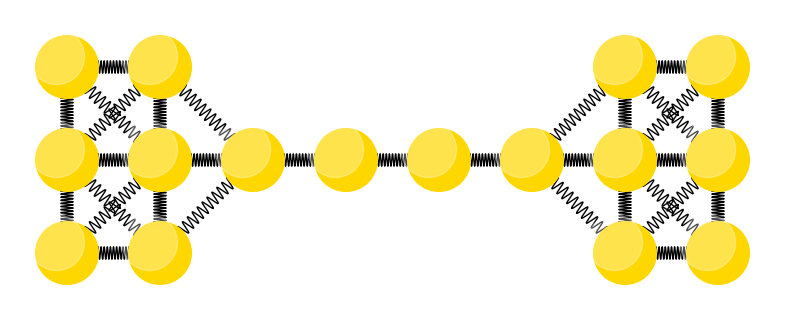

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def draw_system(left_dims, center_dims, right_dims, atom_radius, spring_amp, spring_freq):
    """
    Draws a system of atoms and springs with uniform appearance.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_aspect('equal')
    ax.axis('off')

    atom_spacing = 1.5

    # --- Symmetrie-Anpassung ---
    max_height = max(left_dims[1], center_dims[1], right_dims[1])
    
    y_offset_left = (max_height - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_height - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_height - right_dims[1]) * atom_spacing / 2.0

    # Generate atom positions for each region
    pos_L = [(x * atom_spacing, y_offset_left + y * atom_spacing) for y in range(left_dims[1]) for x in range(left_dims[0])]
    pos_C = [(left_dims[0] * atom_spacing + x * atom_spacing, y_offset_center + y * atom_spacing) for y in range(center_dims[1]) for x in range(center_dims[0])]
    pos_R = [(left_dims[0] * atom_spacing + center_dims[0] * atom_spacing + x * atom_spacing, y_offset_right + y * atom_spacing) for y in range(right_dims[1]) for x in range(right_dims[0])]
    
    atom_positions = pos_L + pos_C + pos_R
    
    # Draw atoms with a gold color, shading, and black border
    for x, y in atom_positions:
        atom_circle = plt.Circle((x, y), atom_radius, color='#FFD700', edgecolor='black', lw=1.5, zorder=2)
        ax.add_artist(atom_circle)
        highlight = plt.Circle((x - atom_radius / 3, y + atom_radius / 3), atom_radius * 0.9, color='white', alpha=0.3, zorder=3)
        ax.add_artist(highlight)

    # Draw springs
    for i in range(len(atom_positions)):
        for j in range(i + 1, len(atom_positions)):
            pos1 = np.array(atom_positions[i])
            pos2 = np.array(atom_positions[j])
            dist = np.linalg.norm(pos2 - pos1)

            is_adjacent = np.isclose(pos1[1], pos2[1], atol=0.1) and np.isclose(dist, atom_spacing, atol=0.1) or \
                          np.isclose(pos1[0], pos2[0], atol=0.1) and np.isclose(dist, atom_spacing, atol=0.1) or \
                          np.isclose(dist, np.sqrt(atom_spacing**2 + atom_spacing**2), atol=0.1)

            if is_adjacent:
                x1, y1 = pos1
                x2, y2 = pos2
                
                dx = x2 - x1
                dy = y2 - y1
                length = np.sqrt(dx**2 + dy**2)
                ux, uy = dx / length, dy / length
                
                x_spring_start = x1 + ux * atom_radius
                y_spring_start = y1 + uy * atom_radius
                x_spring_end = x2 - ux * atom_radius
                y_spring_end = y2 - uy * atom_radius
                
                num_points = 500
                t = np.linspace(0, 1, num_points)
                nx, ny = -uy, ux
                
                # The wiggle is now proportional to the spring's length, ensuring consistent look
                wiggle = spring_amp * np.cos(spring_freq * np.pi * t)
                
                x_spring = (1 - t) * x_spring_start + t * x_spring_end + nx * wiggle
                y_spring = (1 - t) * y_spring_start + t * y_spring_end + ny * wiggle
                
                ax.plot(x_spring, y_spring, color='black', lw=1.0, zorder=1)

    # Adjust plot limits to fit all atoms
    all_x = [p[0] for p in atom_positions]
    all_y = [p[1] for p in atom_positions]
    ax.set_xlim(min(all_x) - atom_radius * 2, max(all_x) + atom_radius * 2)
    ax.set_ylim(min(all_y) - atom_radius * 2, max(all_y) + atom_radius * 2)
    plt.savefig(f"C:\\Users\\sevke\\Desktop\\Uni\\00_Master\\00_Masterarbeit\\03_Plots\\configurations2D\\{left_dims}_{center_dims}_{right_dims}.pdf", bbox_inches='tight')
    plt.show()


# --- System Definition ---
# x, y
left_dims = (2, 3)
center_dims = (4, 1)
right_dims = (2, 3)

# --- Plot the system ---
draw_system(left_dims, center_dims, right_dims, atom_radius=0.5, spring_amp=0.1, spring_freq=20)

C:\Users\sevke\AppData\Local\Temp\ipykernel_19144\2772301390.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  atom_circle = plt.Circle((x, y), atom_radius, color='#FFD700', edgecolor='black', lw=1.5, zorder=2)


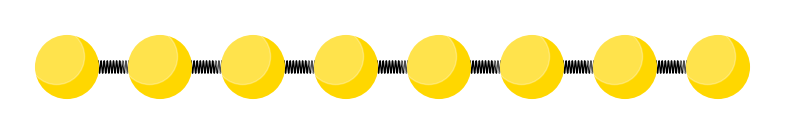

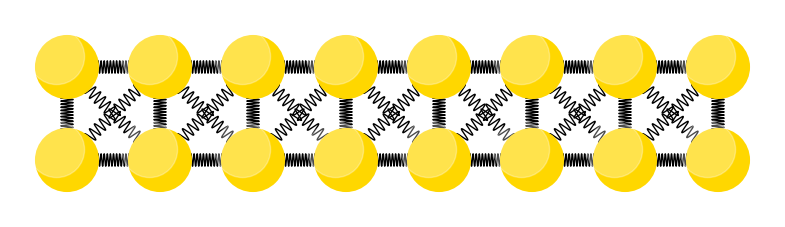

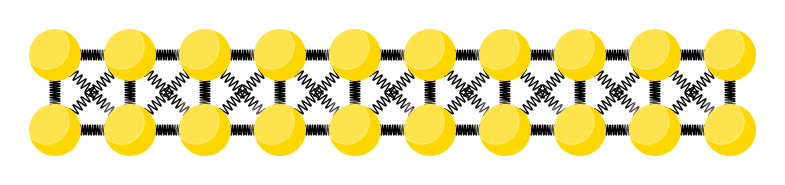

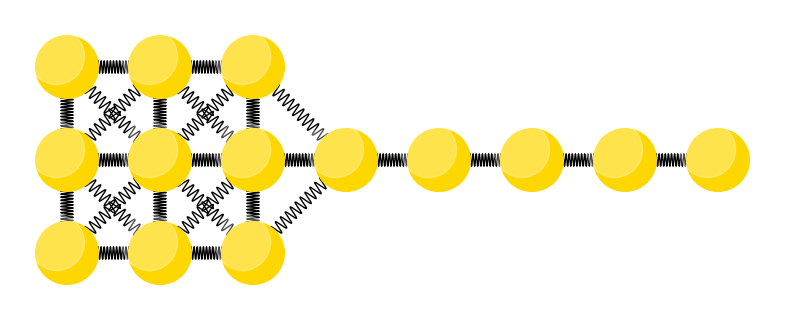

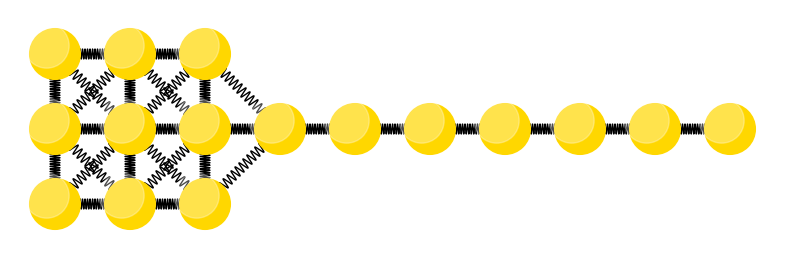

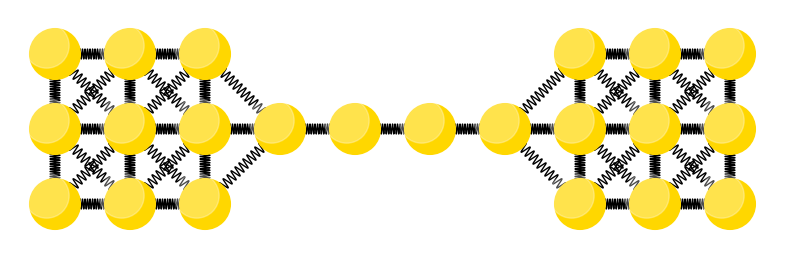

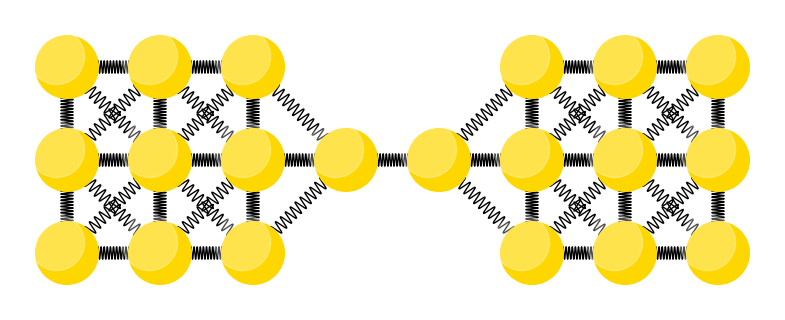

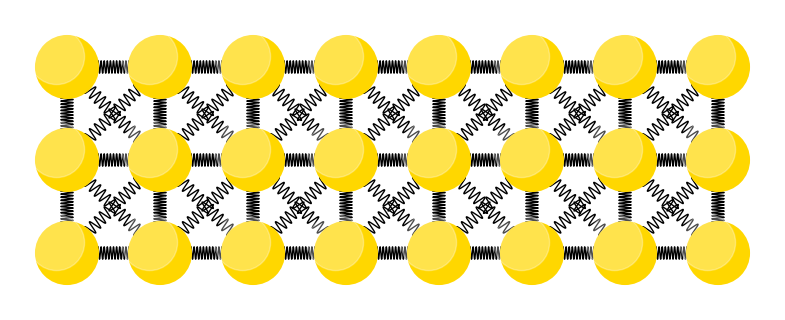

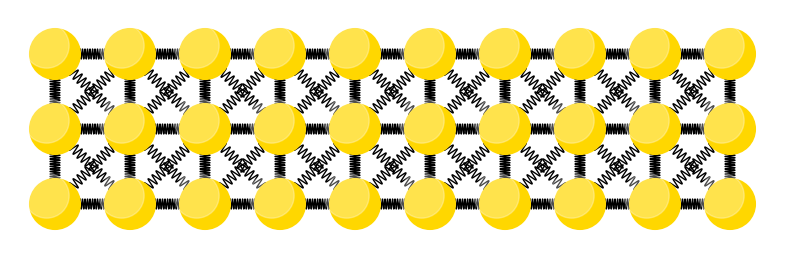

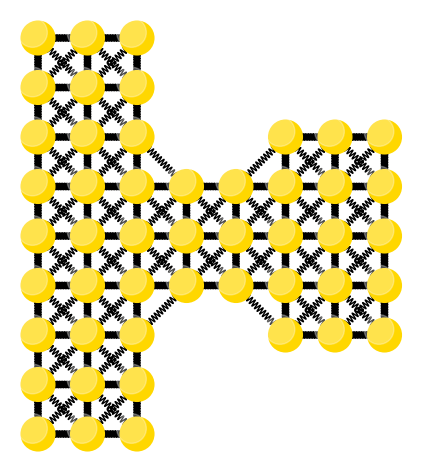

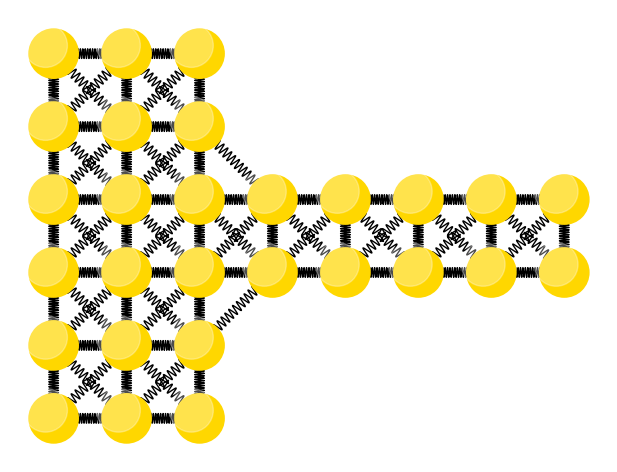

In [43]:
configs = [((3, 1), (2, 1), (3, 1)),
           ((3, 2), (2, 2), (3, 2)),
           ((3, 2), (4, 2), (3, 2)),
           ((3, 3), (2, 1), (3, 1)),
           ((3, 3), (4, 1), (3, 1)),
           ((3, 3), (4, 1), (3, 3)),
           ((3, 3), (2, 1), (3, 3)),
           ((3, 3), (2, 3), (3, 3)),
           ((3, 3), (4, 3), (3, 3)),
           ((3, 9), (2, 3), (3, 5)),
           ((3, 6), (2, 2), (3, 2))
           ]

for left_dims, center_dims, right_dims in configs:
    draw_system(left_dims, center_dims, right_dims, atom_radius=0.5, spring_amp=0.1, spring_freq=20)

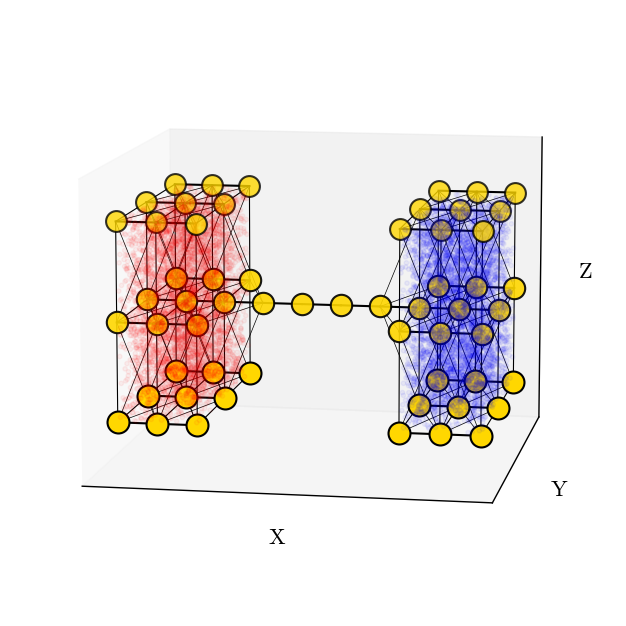

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def draw_system_3d(left_dims, center_dims, right_dims, atom_radius, atom_spacing, coupling_styles, zoom_factor=1.0, elev=15, azim=-60, depth_shading=0.7):
    """
    Draws a 3D system with customizable depth shading for atoms and colored fog for electrodes.
    
    Args:
        left_dims (tuple): Dimensions (x, y, z) of the left electrode.
        center_dims (tuple): Dimensions (x, y, z) of the central region.
        right_dims (tuple): Dimensions (x, y, z) of the right electrode.
        atom_radius (float): Radius of the atoms (for visualization).
        atom_spacing (float): Spacing between adjacent atoms in all directions.
        coupling_styles (dict): A dictionary defining spring types to draw and their linewidth.
        zoom_factor (float): A factor to control the zoom level. 
        elev (float): The elevation angle (vertical tilt) in degrees.
        azim (float): The azimuthal angle (horizontal rotation) in degrees.
        depth_shading (float): A factor to control the intensity of the depth effect (0.0 = none, 1.0 = max).
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('auto')
    
    # --- Symmetrie-Anpassung für Y- und Z-Achse ---
    max_y_dim = max(left_dims[1], center_dims[1], right_dims[1])
    max_z_dim = max(left_dims[2], center_dims[2], right_dims[2])
    
    y_offset_left = (max_y_dim - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_y_dim - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_y_dim - right_dims[1]) * atom_spacing / 2.0

    z_offset_left = (max_z_dim - left_dims[2]) * atom_spacing / 2.0
    z_offset_center = (max_z_dim - center_dims[2]) * atom_spacing / 2.0
    z_offset_right = (max_z_dim - right_dims[2]) * atom_spacing / 2.0
    
    # Generate atom positions for each region
    pos_L = [(x * atom_spacing, y_offset_left + y * atom_spacing, z_offset_left + z * atom_spacing) for z in range(left_dims[2]) for y in range(left_dims[1]) for x in range(left_dims[0])]
    pos_C = [(left_dims[0] * atom_spacing + x * atom_spacing, y_offset_center + y * atom_spacing, z_offset_center + z * atom_spacing) for z in range(center_dims[2]) for y in range(center_dims[1]) for x in range(center_dims[0])]
    pos_R = [(left_dims[0] * atom_spacing + center_dims[0] * atom_spacing + x * atom_spacing, y_offset_right + y * atom_spacing, z_offset_right + z * atom_spacing) for z in range(right_dims[2]) for y in range(right_dims[1]) for x in range(right_dims[0])]
    
    atom_positions = np.array(pos_L + pos_C + pos_R)
    
    # --- Korrektur: Variablen für die Achsenlimits definieren ---
    all_x = atom_positions[:, 0]
    all_y = atom_positions[:, 1]
    all_z = atom_positions[:, 2]

    # --- Generieren des "Nebels" für links und rechts ---
    num_fog_points = 5000  # Anzahl der Punkte für den Nebel
    fog_alpha = 0.05       # Transparenz des Nebels
    
    # Bounding Box für die linke Elektrode
    left_x_min, left_x_max = min(pos_L, key=lambda p: p[0])[0], max(pos_L, key=lambda p: p[0])[0]
    left_y_min, left_y_max = min(pos_L, key=lambda p: p[1])[1], max(pos_L, key=lambda p: p[1])[1]
    left_z_min, left_z_max = min(pos_L, key=lambda p: p[2])[2], max(pos_L, key=lambda p: p[2])[2]
    
    # Zufällige Punkte im linken Bereich generieren und zeichnen (roter Nebel)
    fog_points_L = np.random.rand(num_fog_points, 3)
    fog_points_L[:, 0] = fog_points_L[:, 0] * (left_x_max - left_x_min) + left_x_min
    fog_points_L[:, 1] = fog_points_L[:, 1] * (left_y_max - left_y_min) + left_y_min
    fog_points_L[:, 2] = fog_points_L[:, 2] * (left_z_max - left_z_min) + left_z_min
    ax.scatter(fog_points_L[:, 0], fog_points_L[:, 1], fog_points_L[:, 2], 
               s=10, c='red', alpha=fog_alpha, zorder=0)

    # Bounding Box für die rechte Elektrode
    right_x_min, right_x_max = min(pos_R, key=lambda p: p[0])[0], max(pos_R, key=lambda p: p[0])[0]
    right_y_min, right_y_max = min(pos_R, key=lambda p: p[1])[1], max(pos_R, key=lambda p: p[1])[1]
    right_z_min, right_z_max = min(pos_R, key=lambda p: p[2])[2], max(pos_R, key=lambda p: p[2])[2]
    
    # Zufällige Punkte im rechten Bereich generieren und zeichnen (blauer Nebel)
    fog_points_R = np.random.rand(num_fog_points, 3)
    fog_points_R[:, 0] = fog_points_R[:, 0] * (right_x_max - right_x_min) + right_x_min
    fog_points_R[:, 1] = fog_points_R[:, 1] * (right_y_max - right_y_min) + right_y_min
    fog_points_R[:, 2] = fog_points_R[:, 2] * (right_z_max - right_z_min) + right_z_min
    ax.scatter(fog_points_R[:, 0], fog_points_R[:, 1], fog_points_R[:, 2], 
               s=10, c='blue', alpha=fog_alpha, zorder=0)


    # --- Tiefenwirkung der Atome anpassen ---
    min_z, max_z = np.min(all_z), np.max(all_z)

    for pos in atom_positions:
        # Normalisiere die Z-Position (0 für vorne, 1 für hinten)
        if max_z - min_z > 0:
            z_norm = (pos[2] - min_z) / (max_z - min_z)
        else:
            z_norm = 0.5  # Neutraler Wert, falls nur eine Z-Ebene existiert
        
        # Berechne die Transparenz und die Größe basierend auf dem depth_shading-Faktor
        alpha = 1.0 - z_norm * depth_shading
        size = atom_radius**2 * 1000 * (1.0 - z_norm * depth_shading * 0.5)

        ax.scatter(pos[0], pos[1], pos[2], 
                   s=size, c='#FFD700', edgecolors='black', linewidths=1.5, zorder=2, alpha=alpha)

    # Draw springs based on coupling styles
    for i in range(len(atom_positions)):
        for j in range(i + 1, len(atom_positions)):
            pos1 = atom_positions[i]
            pos2 = atom_positions[j]
            
            d = atom_spacing
            dist_x, dist_y, dist_z = np.abs(pos1 - pos2)
            
            spring_type = None
            if np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, 0):
                spring_type = 'x'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'y'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'z'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'xy'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'xz'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'yz'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'xyz'
            
            if spring_type in coupling_styles:
                ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], 
                        color='black', lw=coupling_styles[spring_type], zorder=1)

    # --- Achsenlimits für den Zoom anpassen ---
    ax.set_xlim(min(all_x) - atom_spacing * zoom_factor, max(all_x) + atom_spacing * zoom_factor)
    ax.set_ylim(min(all_y) - atom_spacing * zoom_factor, max(all_y) + atom_spacing * zoom_factor)
    ax.set_zlim(min(all_z) - atom_spacing * zoom_factor, max(all_z) + atom_spacing * zoom_factor)
    
    # --- Winkel anpassen ---
    ax.view_init(elev=elev, azim=azim)

    # Clean up the plot axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.savefig(r"C:\Users\sevke\Desktop\Uni\00_Master\00_Masterarbeit\03_Plots\LandauBuettiker\atomistic_system_3d.svg", bbox_inches='tight')
    plt.show()

# --- Beispiel für die Verwendung des 3D-Codes ---
left_dims = (3, 3, 3)
center_dims = (4, 1, 1)
right_dims = (3, 3, 3)

coupling_styles = {
    'x': 1.5,
    'y': 0.8,
    'z': 0.8,
    'xy': 0.5,
    'xz': 0.5
}

draw_system_3d(left_dims, center_dims, right_dims, atom_radius=0.5, atom_spacing=1.5, coupling_styles=coupling_styles, zoom_factor=0.5, elev=10, azim=-80, depth_shading=0.2)

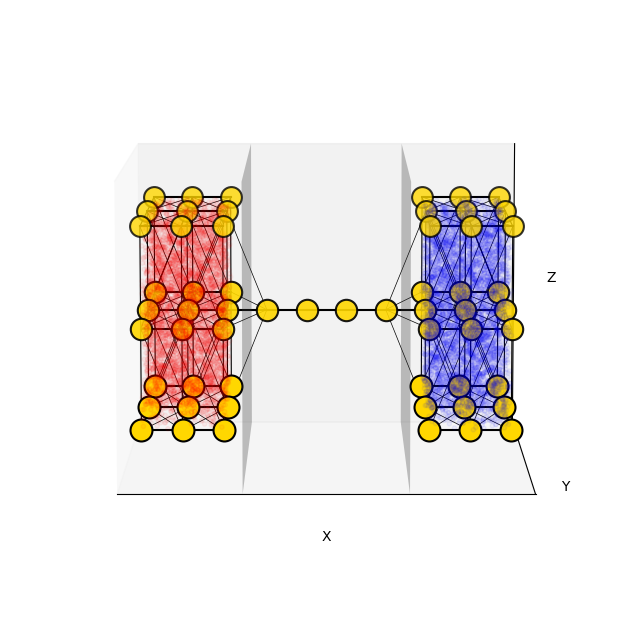

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def draw_system_3d(left_dims, center_dims, right_dims, atom_radius, atom_spacing, coupling_styles, zoom_factor=1.0, elev=15, azim=-60, depth_shading=0.7, plane_extension_factor=1.0):
    """
    Draws a 3D system with customizable depth shading for atoms, colored fog for electrodes, and transparent planes for region separation.
    
    Args:
        left_dims (tuple): Dimensions (x, y, z) of the left electrode.
        center_dims (tuple): Dimensions (x, y, z) of the central region.
        right_dims (tuple): Dimensions (x, y, z) of the right electrode.
        atom_radius (float): Radius of the atoms (for visualization).
        atom_spacing (float): Spacing between adjacent atoms in all directions.
        coupling_styles (dict): A dictionary defining spring types to draw and their linewidth.
        zoom_factor (float): A factor to control the zoom level. 
        elev (float): The elevation angle (vertical tilt) in degrees.
        azim (float): The azimuthal angle (horizontal rotation) in degrees.
        depth_shading (float): A factor to control the intensity of the depth effect (0.0 = none, 1.0 = max).
        plane_extension_factor (float): Factor to control how much the planes extend beyond the atoms.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('auto')
    
    # --- Symmetrie-Anpassung für Y- und Z-Achse ---
    max_y_dim = max(left_dims[1], center_dims[1], right_dims[1])
    max_z_dim = max(left_dims[2], center_dims[2], right_dims[2])
    
    y_offset_left = (max_y_dim - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_y_dim - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_y_dim - right_dims[1]) * atom_spacing / 2.0

    z_offset_left = (max_z_dim - left_dims[2]) * atom_spacing / 2.0
    z_offset_center = (max_z_dim - center_dims[2]) * atom_spacing / 2.0
    z_offset_right = (max_z_dim - right_dims[2]) * atom_spacing / 2.0
    
    # Generate atom positions for each region
    pos_L = [(x * atom_spacing, y_offset_left + y * atom_spacing, z_offset_left + z * atom_spacing) for z in range(left_dims[2]) for y in range(left_dims[1]) for x in range(left_dims[0])]
    pos_C = [(left_dims[0] * atom_spacing + x * atom_spacing, y_offset_center + y * atom_spacing, z_offset_center + z * atom_spacing) for z in range(center_dims[2]) for y in range(center_dims[1]) for x in range(center_dims[0])]
    pos_R = [(left_dims[0] * atom_spacing + center_dims[0] * atom_spacing + x * atom_spacing, y_offset_right + y * atom_spacing, z_offset_right + z * atom_spacing) for z in range(right_dims[2]) for y in range(right_dims[1]) for x in range(right_dims[0])]
    
    atom_positions = np.array(pos_L + pos_C + pos_R)
    
    # --- Variablen für die Achsenlimits definieren ---
    all_x = atom_positions[:, 0]
    all_y = atom_positions[:, 1]
    all_z = atom_positions[:, 2]

    # --- Generieren des "Nebels" für links und rechts ---
    num_fog_points = 5000  # Anzahl der Punkte für den Nebel
    fog_alpha = 0.05       # Transparenz des Nebels
    
    # Bounding Box für die linke Elektrode
    left_x_min, left_x_max = (min(pos_L, key=lambda p: p[0])[0], max(pos_L, key=lambda p: p[0])[0]) if pos_L else (0, 0)
    left_y_min, left_y_max = (min(pos_L, key=lambda p: p[1])[1], max(pos_L, key=lambda p: p[1])[1]) if pos_L else (0, 0)
    left_z_min, left_z_max = (min(pos_L, key=lambda p: p[2])[2], max(pos_L, key=lambda p: p[2])[2]) if pos_L else (0, 0)

    if pos_L:
        fog_points_L = np.random.rand(num_fog_points, 3)
        fog_points_L[:, 0] = fog_points_L[:, 0] * (left_x_max - left_x_min) + left_x_min
        fog_points_L[:, 1] = fog_points_L[:, 1] * (left_y_max - left_y_min) + left_y_min
        fog_points_L[:, 2] = fog_points_L[:, 2] * (left_z_max - left_z_min) + left_z_min
        ax.scatter(fog_points_L[:, 0], fog_points_L[:, 1], fog_points_L[:, 2], 
                   s=10, c='red', alpha=fog_alpha, zorder=0)

    # Bounding Box für die rechte Elektrode
    right_x_min, right_x_max = (min(pos_R, key=lambda p: p[0])[0], max(pos_R, key=lambda p: p[0])[0]) if pos_R else (0, 0)
    right_y_min, right_y_max = (min(pos_R, key=lambda p: p[1])[1], max(pos_R, key=lambda p: p[1])[1]) if pos_R else (0, 0)
    right_z_min, right_z_max = (min(pos_R, key=lambda p: p[2])[2], max(pos_R, key=lambda p: p[2])[2]) if pos_R else (0, 0)
    
    if pos_R:
        fog_points_R = np.random.rand(num_fog_points, 3)
        fog_points_R[:, 0] = fog_points_R[:, 0] * (right_x_max - right_x_min) + right_x_min
        fog_points_R[:, 1] = fog_points_R[:, 1] * (right_y_max - right_y_min) + right_y_min
        fog_points_R[:, 2] = fog_points_R[:, 2] * (right_z_max - right_z_min) + right_z_min
        ax.scatter(fog_points_R[:, 0], fog_points_R[:, 1], fog_points_R[:, 2], 
                   s=10, c='blue', alpha=fog_alpha, zorder=0)

    # --- Hinzufügen der Abgrenzungsflächen im Zwischenraum ---
    # Die Flächen werden um den Abstand atom_spacing * plane_extension_factor vergrößert
    y_start = min(all_y) - atom_spacing * plane_extension_factor
    y_end = max(all_y) + atom_spacing * plane_extension_factor
    z_start = min(all_z) - atom_spacing * plane_extension_factor
    z_end = max(all_z) + atom_spacing * plane_extension_factor
    
    y_range = np.linspace(y_start, y_end, 2)
    z_range = np.linspace(z_start, z_end, 2)
    Y, Z = np.meshgrid(y_range, z_range)
    
    # NEU: Plane zwischen L und C wird in die Mitte der Lücke verschoben
    x_pos_LC = left_dims[0] * atom_spacing - atom_spacing / 2.0
    X_LC = np.full_like(Y, x_pos_LC)
    ax.plot_surface(X_LC, Y, Z, color='gray', alpha=0.3, zorder=-1)
    
    # NEU: Plane zwischen C und R wird in die Mitte der Lücke verschoben
    x_pos_CR = (left_dims[0] + center_dims[0]) * atom_spacing - atom_spacing / 2.0
    X_CR = np.full_like(Y, x_pos_CR)
    ax.plot_surface(X_CR, Y, Z, color='gray', alpha=0.3, zorder=-1)

    # --- Tiefenwirkung der Atome anpassen ---
    min_z, max_z = np.min(all_z), np.max(all_z)

    for pos in atom_positions:
        if max_z - min_z > 0:
            z_norm = (pos[2] - min_z) / (max_z - min_z)
        else:
            z_norm = 0.5
        
        alpha = 1.0 - z_norm * depth_shading
        size = atom_radius**2 * 1000 * (1.0 - z_norm * depth_shading * 0.5)

        ax.scatter(pos[0], pos[1], pos[2], 
                   s=size, c='#FFD700', edgecolors='black', linewidths=1.5, zorder=2, alpha=alpha)

    # Draw springs based on coupling styles
    for i in range(len(atom_positions)):
        for j in range(i + 1, len(atom_positions)):
            pos1 = atom_positions[i]
            pos2 = atom_positions[j]
            
            d = atom_spacing
            dist_x, dist_y, dist_z = np.abs(pos1 - pos2)
            
            spring_type = None
            if np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, 0):
                spring_type = 'x'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'y'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'z'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, 0):
                spring_type = 'xy'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, 0) and np.isclose(dist_z, d):
                spring_type = 'xz'
            elif np.isclose(dist_x, 0) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'yz'
            elif np.isclose(dist_x, d) and np.isclose(dist_y, d) and np.isclose(dist_z, d):
                spring_type = 'xyz'
            
            if spring_type in coupling_styles:
                ax.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], [pos1[2], pos2[2]], 
                        color='black', lw=coupling_styles[spring_type], zorder=1)

    # --- Achsenlimits für den Zoom anpassen ---
    ax.set_xlim(min(all_x) - atom_spacing * zoom_factor, max(all_x) + atom_spacing * zoom_factor)
    ax.set_ylim(min(all_y) - atom_spacing * zoom_factor, max(all_y) + atom_spacing * zoom_factor)
    ax.set_zlim(min(all_z) - atom_spacing * zoom_factor, max(all_z) + atom_spacing * zoom_factor)
    
    # --- Winkel anpassen ---
    ax.view_init(elev=elev, azim=azim)

    # Clean up the plot axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.savefig(r"C:\Users\sevke\Desktop\Uni\00_Master\00_Masterarbeit\03_Plots\LandauBuettiker\atomistic_system_3d_neu.svg", bbox_inches='tight')
    plt.show()

# --- Beispiel für die Verwendung des 3D-Codes ---
left_dims = (3, 3, 3)
center_dims = (4, 1, 1)
right_dims = (3, 3, 3)

coupling_styles = {
    'x': 1.5,
    'y': 0.8,
    'z': 0.8,
    'xy': 0.5,
    'xz': 0.5
}

# Ändern Sie den Wert von 'plane_extension_factor', um die Größe der Flächen anzupassen
draw_system_3d(left_dims, center_dims, right_dims, atom_radius=0.5, atom_spacing=1.5, coupling_styles=coupling_styles, zoom_factor=0.5, elev=8, azim=-90, depth_shading=0.2, plane_extension_factor=0.5)

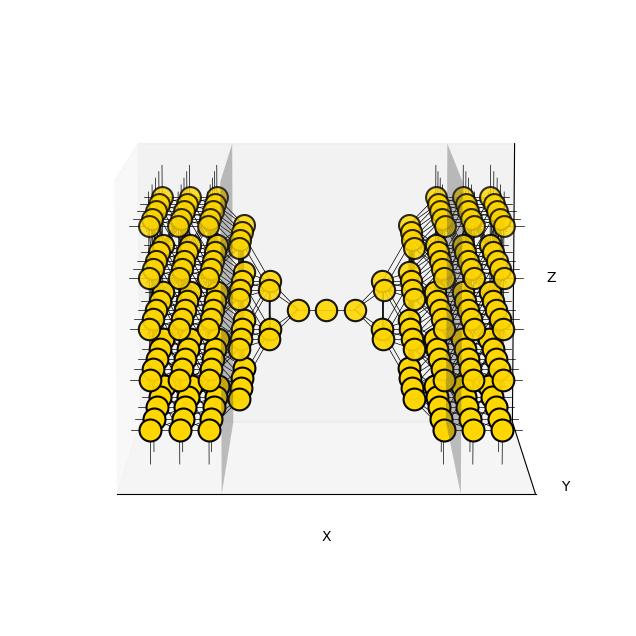

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def draw_system_3d(left_dims, center_dims, right_dims, pyramid_height, atom_radius, atom_spacing, continuation_length=1.0, finer_linewidth=0.5, zoom_factor=1.0, elev=15, azim=-60, depth_shading=0.7, plane_extension=1.0):
    """
    Zeichnet ein 3D-System mit zwei Elektroden, einem zentralen Bauteil und 
    zwei symmetrischen Atompyramiden als Übergang.

    Args:
        left_dims (tuple): Dimensionen (x, y, z) der linken Elektrode.
        center_dims (tuple): Dimensionen (x, y, z) des zentralen Bauteils.
        right_dims (tuple): Dimensionen (x, y, z) der rechten Elektrode.
        pyramid_height (int): Die Höhe der Pyramiden in Atom-Schichten.
        atom_radius (float): Radius der Atome (für die Visualisierung).
        atom_spacing (float): Abstand zwischen benachbarten Atomen.
        continuation_length (float): Länge der Linien, die die Fortsetzung
                                       des Systems symbolisieren.
        finer_linewidth (float): Linienstärke für die Verbindungslinien.
        zoom_factor (float): Ein Faktor, der den Zoom-Level steuert.
        elev (float): Der Elevationswinkel (vertikale Neigung) in Grad.
        azim (float): Der Azimutwinkel (horizontale Drehung) in Grad.
        depth_shading (float): Faktor zur Steuerung der Tiefenwirkung (0.0 = keine, 1.0 = max).
        plane_extension (float): Faktor zur Steuerung, wie weit die Trennflächen
                                über die Atome hinausgehen.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('auto')
    
    # --- Symmetrie-Anpassung für Y- und Z-Achse ---
    max_y_dim = max(left_dims[1], center_dims[1], right_dims[1])
    max_z_dim = max(left_dims[2], center_dims[2], right_dims[2])
    
    y_offset_left = (max_y_dim - left_dims[1]) * atom_spacing / 2.0
    y_offset_center = (max_y_dim - center_dims[1]) * atom_spacing / 2.0
    y_offset_right = (max_y_dim - right_dims[1]) * atom_spacing / 2.0

    z_offset_left = (max_z_dim - left_dims[2]) * atom_spacing / 2.0
    z_offset_center = (max_z_dim - center_dims[2]) * atom_spacing / 2.0
    z_offset_right = (max_z_dim - right_dims[2]) * atom_spacing / 2.0
    
    # --- Atompositionen für jede Region generieren ---
    total_x_layers = left_dims[0] + pyramid_height + center_dims[0] + pyramid_height + right_dims[0]
    center_x_layer = total_x_layers / 2.0
    
    pos_L = []
    pos_P1 = []
    pos_C = []
    pos_P2 = []
    pos_R = []
    
    current_layer = 0

    # Linke Elektrode
    for x_layer in range(left_dims[0]):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        for y in range(left_dims[1]):
            for z in range(left_dims[2]):
                pos_L.append((x_pos, y_offset_left + y * atom_spacing, z_offset_left + z * atom_spacing))
        current_layer += 1
    
    x_pos_LP1 = (current_layer - center_x_layer) * atom_spacing
    
    # Linke Pyramide
    for x_layer in range(pyramid_height):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        current_y_dim = left_dims[1] - int(np.round((left_dims[1] - center_dims[1]) * (x_layer + 1) / pyramid_height))
        current_z_dim = left_dims[2] - int(np.round((left_dims[2] - center_dims[2]) * (x_layer + 1) / pyramid_height))
        
        y_offset = (max_y_dim - current_y_dim) * atom_spacing / 2.0
        z_offset = (max_z_dim - current_z_dim) * atom_spacing / 2.0
        
        for y in range(current_y_dim):
            for z in range(current_z_dim):
                pos_P1.append((x_pos, y_offset + y * atom_spacing, z_offset + z * atom_spacing))
        current_layer += 1

    # Zentrales Bauteil
    for x_layer in range(center_dims[0]):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        for y in range(center_dims[1]):
            for z in range(center_dims[2]):
                pos_C.append((x_pos, y_offset_center + y * atom_spacing, z_offset_center + z * atom_spacing))
        current_layer += 1

    # Rechte Pyramide
    for x_layer in range(pyramid_height):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        current_y_dim = center_dims[1] + int(np.round((right_dims[1] - center_dims[1]) * (x_layer + 1) / pyramid_height))
        current_z_dim = center_dims[2] + int(np.round((right_dims[2] - center_dims[2]) * (x_layer + 1) / pyramid_height))
        
        y_offset = (max_y_dim - current_y_dim) * atom_spacing / 2.0
        z_offset = (max_z_dim - current_z_dim) * atom_spacing / 2.0
        
        for y in range(current_y_dim):
            for z in range(current_z_dim):
                pos_P2.append((x_pos, y_offset + y * atom_spacing, z_offset + z * atom_spacing))
        current_layer += 1

    x_pos_P2R = (current_layer - center_x_layer) * atom_spacing

    # Rechte Elektrode
    for x_layer in range(right_dims[0]):
        x_pos = (current_layer - center_x_layer + 0.5) * atom_spacing
        for y in range(right_dims[1]):
            for z in range(right_dims[2]):
                pos_R.append((x_pos, y_offset_right + y * atom_spacing, z_offset_right + z * atom_spacing))
        current_layer += 1
    
    atom_positions = np.array(pos_L + pos_P1 + pos_C + pos_P2 + pos_R)
    
    all_x = atom_positions[:, 0]
    all_y = atom_positions[:, 1]
    all_z = atom_positions[:, 2]

    
    
    # --- Hinzufügen der Abgrenzungsflächen im Zwischenraum ---
    y_start = min(all_y) - atom_spacing * plane_extension
    y_end = max(all_y) + atom_spacing * plane_extension
    z_start = min(all_z) - atom_spacing * plane_extension
    z_end = max(all_z) + atom_spacing * plane_extension
    
    y_range = np.linspace(y_start, y_end, 2)
    z_range = np.linspace(z_start, z_end, 2)
    Y, Z = np.meshgrid(y_range, z_range)
    
    X_LP1 = np.full_like(Y, x_pos_LP1)
    ax.plot_surface(X_LP1, Y, Z, color='gray', alpha=0.3, zorder=-1)
    
    X_P2R = np.full_like(Y, x_pos_P2R)
    ax.plot_surface(X_P2R, Y, Z, color='gray', alpha=0.3, zorder=-1)

    # --- Tiefenwirkung der Atome anpassen ---
    min_z, max_z = np.min(all_z), np.max(all_z)
    
    for pos in atom_positions:
        if max_z - min_z > 0:
            z_norm = (pos[2] - min_z) / (max_z - min_z)
        else:
            z_norm = 0.5
        
        alpha = 1.0 - z_norm * depth_shading
        size = atom_radius**2 * 1000 * (1.0 - z_norm * depth_shading * 0.5)

        ax.scatter(pos[0], pos[1], pos[2], 
                   s=size, c='#FFD700', edgecolors='black', linewidths=1.5, zorder=2, alpha=alpha)

    # --- Verbindungslinien in alle Richtungen zeichnen (korrigierte Logik) ---
    drawn_lines = set()
    # Maximaler Abstand, innerhalb dessen Atome als Nachbarn gelten (geringfügig größer als die längste Diagonale)
    max_dist_sq = (atom_spacing * 1.5)**2  
    
    for i in range(len(atom_positions)):
        p1 = atom_positions[i]
        for j in range(i + 1, len(atom_positions)):
            p2 = atom_positions[j]
            
            dist_sq = np.sum((p1 - p2)**2)
            
            # Wenn der Abstand geringer als der maximale Abstand ist, zeichne eine Linie
            if dist_sq < max_dist_sq:
                line_tuple = tuple(sorted((tuple(p1), tuple(p2))))
                if line_tuple not in drawn_lines:
                    ax.plot([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 
                            color='black', lw=finer_linewidth, zorder=1)
                    drawn_lines.add(line_tuple)


    # --- Hinzufügen der Fortsetzungslinien an den Rändern ---
    leftmost_x = min(p[0] for p in pos_L)
    rightmost_x = max(p[0] for p in pos_R)
    bottom_y = min(all_y)
    top_y = max(all_y)
    back_z = min(all_z)
    front_z = max(all_z)
    
    # Iterate through all atoms and draw continuation lines at the boundary
    for pos in atom_positions:
        if np.isclose(pos[0], leftmost_x):
            ax.plot([pos[0] - continuation_length, pos[0]], [pos[1], pos[1]], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[0], rightmost_x):
            ax.plot([pos[0], pos[0] + continuation_length], [pos[1], pos[1]], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[1], bottom_y):
            ax.plot([pos[0], pos[0]], [pos[1] - continuation_length, pos[1]], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[1], top_y):
            ax.plot([pos[0], pos[0]], [pos[1], pos[1] + continuation_length], [pos[2], pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[2], back_z):
            ax.plot([pos[0], pos[0]], [pos[1], pos[1]], [pos[2] - continuation_length, pos[2]],
                    color='black', lw=finer_linewidth, zorder=1)
        if np.isclose(pos[2], front_z):
            ax.plot([pos[0], pos[0]], [pos[1], pos[1]], [pos[2], pos[2] + continuation_length],
                    color='black', lw=finer_linewidth, zorder=1)

    # --- Achsenlimits für den Zoom anpassen ---
    ax.set_xlim(min(all_x) - continuation_length - 0.5, 
                max(all_x) + continuation_length + 0.5)
    ax.set_ylim(min(all_y) - continuation_length - 0.5, max(all_y) + continuation_length + 0.5)
    ax.set_zlim(min(all_z) - continuation_length - 0.5, max(all_z) + continuation_length + 0.5)
    
    ax.view_init(elev=elev, azim=azim)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.savefig(r"C:\Users\sevke\Desktop\Uni\00_Master\00_Masterarbeit\03_Plots\LandauBuettiker\3D_System.svg", bbox_inches='tight')
    plt.show()

# --- Beispiel für die Verwendung des 3D-Codes ---
left_dims = (3, 5, 5)
center_dims = (2, 1, 1)
right_dims = (2, 5, 5)
pyramid_height = 3 

# Ändern Sie die Werte, um die Größe der Flächen oder die Länge der Fortsetzungslinien anzupassen
draw_system_3d(left_dims, center_dims, right_dims, pyramid_height, atom_radius=0.5, atom_spacing=1.5, continuation_length=1.0, finer_linewidth=0.5, zoom_factor=0.5, elev=8, azim=-90, depth_shading=0.2, plane_extension=1)
